In [1]:
import gymnasium as gym
import pygame
import numpy as np
import agents
import torch
import simulation


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cuda device


In [3]:
hidden_dim = 256
alpha = 0.01
gamma = 0.99
epsilon = 0.15
n = 20
n_episodes = 1250

In [5]:
# env = gym.make("LunarLander-v2", render_mode='human')
env = gym.make("LunarLander-v2", render_mode='rgb_array')

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# env = gym.make("LunarLander-v2", render_mode='rgb_array')
# print(list(range(env.action_space.n)))
agent_sarsa = agents.AgentSARSA(
                        state_dim=env.observation_space.shape[0],
                        action_dim=env.action_space.n,
                        hidden_dim=hidden_dim,
                        alpha=alpha,
                        gamma=gamma,
                        epsilon=epsilon)

# s, info = env.reset()
# s_tensor = torch.from_numpy(s).float()
# a_probs = agent_sarsa.get_action_probs_from_Q(s_tensor)
# a = agent_sarsa.get_action_from_Q(s_tensor)
# print(a)
# print(a_probs)

# grad = agent_sarsa.get_gradient()
# print(grad)
# agent = agents.AlwaysUp()
runs = []
n_epi = 0
while(True):
    G = runEpisodeSarsa(env, agent=agent_sarsa)
    print(f"n_epi = {n_epi}, G = {G}")
    runs.append(G)
    n_epi+=1

Linear(in_features=8, out_features=256, bias=True)
Linear(in_features=256, out_features=4, bias=True)
N_steps = 72
-200.24163201036367
N_steps = 70
-543.6344955834816
N_steps = 80
-734.502501829427
N_steps = 60
-355.8429676138096
N_steps = 57
-353.69295298890177
N_steps = 82
-466.0258847671372
N_steps = 59
-536.2591380679954
N_steps = 55
-442.28286403937557
N_steps = 56
-477.098134453697
N_steps = 68
-591.4506496807784
N_steps = 69
-583.3734234428414
N_steps = 93
-366.11970535519765
N_steps = 88
-818.9498811425232
N_steps = 55
-431.9353158509973
N_steps = 78
-544.0628287317638
N_steps = 56
-435.4800489140242
N_steps = 80
-816.8077617240723
N_steps = 88
-787.3533265321227
N_steps = 64
-565.4255237260261
N_steps = 70
-508.38008321467265
N_steps = 57
-413.4596872071511
N_steps = 59
-472.1343830320995
N_steps = 67
-454.8169739726012
N_steps = 55
-426.845609040828
N_steps = 89
-921.8716048717127
N_steps = 83
-765.2814204437728
N_steps = 59
-498.00755945806605
N_steps = 75
-475.9319105689704

KeyboardInterrupt: 

In [5]:
runs_df = pd.DataFrame(runs, columns=['total_reward'])

In [6]:
runs_df

,total_reward
0,-433.166443
1,-320.016101
2,-433.997526
3,-702.196303
4,-104.740778
...,...
1026,-559.988181
1027,-494.304355
1028,-378.785819
1029,-342.551852


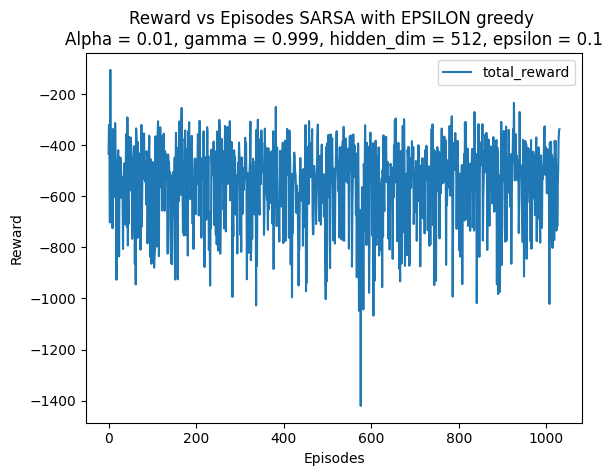

In [7]:
# sns.lineplot(df_melt, x='Time', y='J', err_style="bars", errorbar=("sd", 1), err_kws=)
sns.lineplot(runs_df, err_style="band", errorbar=("sd", 1))

plt.ylabel(f"Reward")
plt.xlabel(f"Episodes")

title = f"Reward vs Episodes SARSA with EPSILON greedy \nAlpha = {alpha}, gamma = {gamma}, hidden_dim = {hidden_dim}, epsilon = {epsilon}"
plt.title(title)
plt.savefig(f"plots/SARSA EPSILON greedy Alpha:{alpha} gamma:{gamma} hidden_dim:{hidden_dim} epsilon:{epsilon}.jpg", bbox_inches='tight')
plt.show()


In [15]:
agent_sarsa.qnet

Q_Network(
  (x_layer): Linear(in_features=8, out_features=200, bias=True)
  (h_layer): Linear(in_features=200, out_features=200, bias=True)
  (y_layer): Linear(in_features=200, out_features=4, bias=True)
)